---

# Universidad de Costa Rica
### Facultad de Ingeniería
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
# Laboratorio de programación 1: Conceptos de probabilidad
*Realizado por:* **Jonathan Rojas Sibaja** y **Fabián Abarca Calderón**

#### *Profesor:* **Fabián Abarca Calderón** 
#### *Grupo 01*  
#### *I - 2020* 
####  *Estudiante:* **Belinda Brown Ramírez B61254**




## 1) Definición clásica de la probabilidad

## Ejemplo 1.1

**Ejemplo resuelto**: el espacio de resultados elementales al lanzar una moneda es:

$$E = \left\lbrace 1,2,3,4,5,6 \right\rbrace$$

¿Cuál es la probabilidad de cada suceso? [1]

In [ ]:
espacio_muestras = [1,2,3,4,5,6]
n = len(espacio_muestras)
probabilidad = 1.0/n
print(probabilidad)

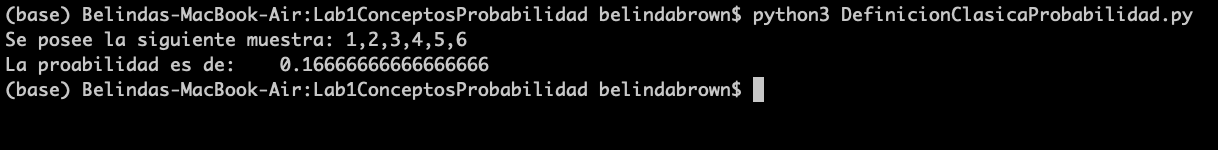

¿Cuál es la probabilidad de que salga un número par?

In [ ]:
numeros_pares = [i for i in espacio_muestras if i % 2 is 0]
h = len(numeros_pares)
probabilidadpares = float(h)/n
print(probabilidadpares)

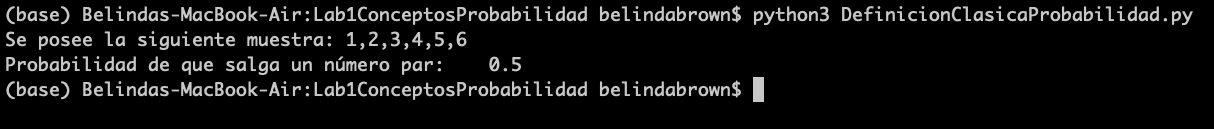

## Ejemplo 1.2

* ¿Cuál es la probabilidad de que una carta sacada de un mazo (52 cartas en cuatro palos) sea divisible por 6?

In [ ]:
# Crear espacio de muestras
palo = [i+1 for i in range(13)]

# Comprobar divisibilidad por 6
divisible_6 = [i for i in palo if i % 6 is 0]

'''
Tomando en cuenta que hay cuatro palos,
la frecuencia relativa de los números
divisibles por 6 es:
'''

probabilidad_6 = (4*float(len(divisible_6)))/(4*len(palo))
print("La probabilidad es {0:0.2f}".format(probabilidad_6))

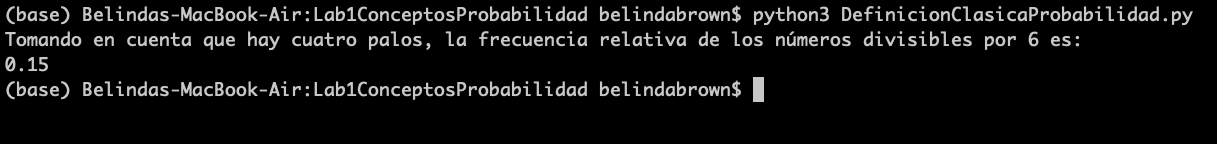

## 2) Eventos independientes

## Ejemplo 2.1

**Ejemplo resuelto**: el siguiente es un ejemplo para la solución "elegante" de un problema común.

> ¿Cuál es la probabilidad de que, al lanzar dos dados, la suma de los dados sea 7? [2]

El resultado es fácil de deducir: de 36 combinaciones posibles, seis suman siete (1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1), entonces 6/36 = 1/6 $\approx$ 0.16667.

**Solución alternativa**

Primero, el objeto `defaultdict` del [módulo](https://docs.python.org/2/library/collections.html) `collections` crea diccionarios con valores predeterminados cuando encuentra una nueva clave. Su uso práctico es el de ser un "diccionario rellenable".

In [ ]:
from collections import defaultdict

Ahora, es posible crear un diccionario con todas las combinaciones posibles y la suma de cada una, con un doble bucle `for` (observen qué poderosa es la sintaxis de Python aquí):

In [ ]:
d = {(i,j) : i+j for i in range(1, 7) for j in range(1,7)}
print(d)

Seguidamente se crea un `defaultdict` vacío. Este implica que, más adelante, si una clave no es encontrada en el diccionario, en lugar de un `KeyError` se crea una nueva entrada (un nuevo par `key:value`). Si no saben qué es `KeyError` o `key:value`, pueden ir a leer más sobre diccionarios en Python.

In [ ]:
dinv = defaultdict(list)
print(dinv)

Es posible extraer del diccionario las combinaciones que suman 7. El método `.items()` genera una lista de pares de "tuplas" (una tupla es un conjunto ordenado e inmutable de elementos) a partir del diccionario de combinaciones creado en `d`. "Rellenamos" el `defaultdict` con los elementos en el diccionario creado anteriormente y el método `.append()`, esto con un bucle `for` en donde los índices `i,j` representan los pares de combinaciones y su suma. La ventaja es que ahora están todos agrupados.

In [ ]:
print('Antes...\n')
print(d.items())

for i,j in d.items(): 
        dinv[j].append(i)

print('\nDespués...')        
dinv

El `for` anterior puede leerse como: "para cada par en la lista de ítemes, en la posición `j` (la suma de las combinaciones) añada la combinación correspondiente (en `i`)".

Extraemos los pares que suman siete y obtenemos la cantidad de estos.

In [ ]:
print('Combinaciones que suman 7:', dinv[7])
print('Elementos:', len(dinv[7]))

Finalmente, y más en general, se obtiene la probabilidad para todas las sumas en forma de un solo diccionario:

In [ ]:
probabilidades = {i : len(j)/36 for i,j in dinv.items()}
print('El vector de probabilidades de suma es =', probabilidades)
print('La probabilidad de que la suma sea 7 es =', probabilidades[7])

### Resultado  ------ ¿Cuál es la probabilidad de que, al lanzar dos dados, la suma de los dados sea 7?
# R/

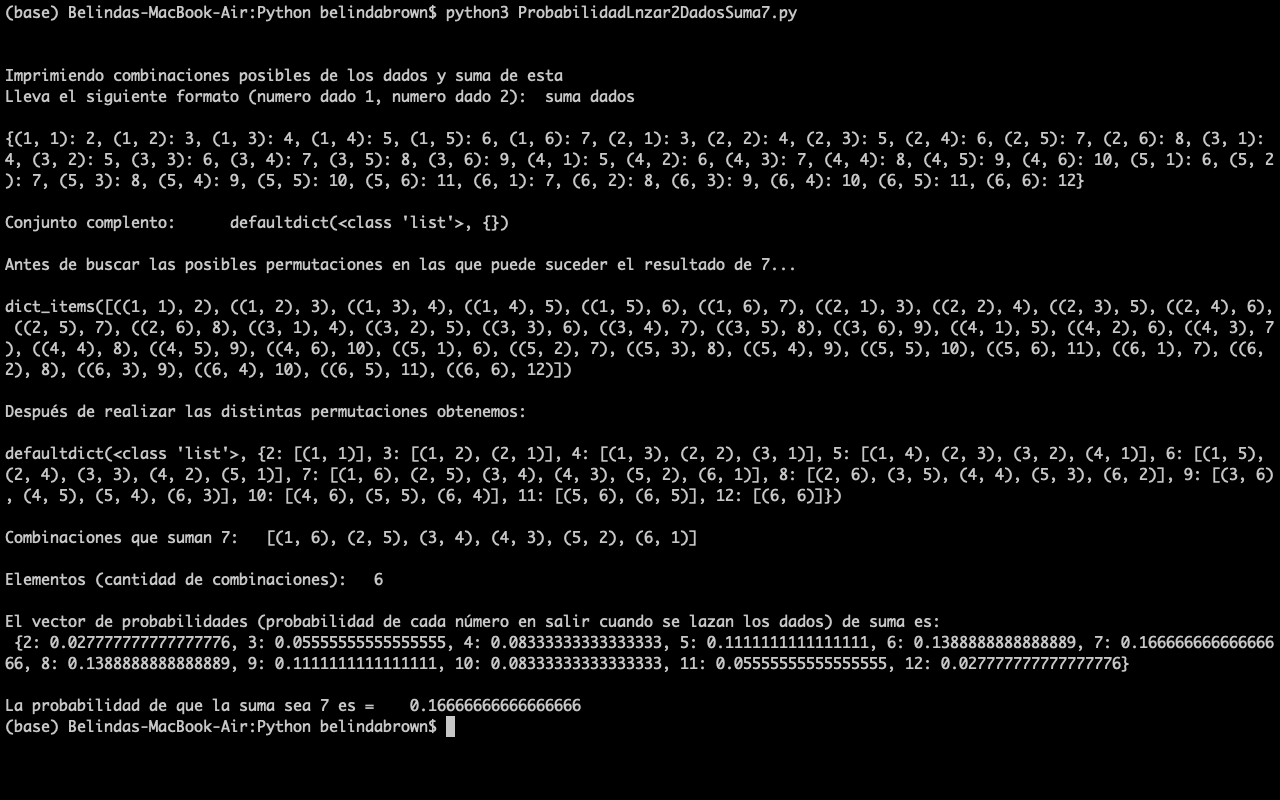



## Ejemplo 2.2

Con el método anterior, puede resolverse ahora un problema más extenso:

* Las placas del país tienen tres letras y tres dígitos numéricos. En cierto juego, unos amigos apuestan un fresco de tamarindo para el primero que encuentre una placa cuyos dígitos numéricos suman: 10 para A(ndrea), 15 para B(renda) y 20 para C(arlos). ¿Quién tiene más probabilidades de ganar?

In [ ]:
#Resolución de problema placas y suma
#Ejemplo 2.2
###Las placas del país tienen tres letras y
##tres dígitos numéricos. En cierto juego, unos
##amigos apuestan un fresco de tamarindo para el primero
##que encuentre una placa cuyos dígitos numéricos suman:
## 10 para A(ndrea), 15 para B(renda) y 20 para C(arlos).
##¿Quién tiene más probabilidades de ganar?

##Forma de ejecutarlo
#python3 PlacasConSumaDigitosDeterminado.py

#Importando paquetes necesarios
from collections import defaultdict

#Creando diccionario con todas las combinaciones posibles y la suma de cada una
#dado que son 0-9 los numeros  y tres posibles
d = {(i,j) : i+j for i in range(0, 9) for j in range(0,9) for k in range(0,9)}

print("\n")
print("Imprimiendo combinaciones posibles de las placas y suma de esta")
print("Lleva el siguiente formato (Digito uno, Digito 2, Digito 3):  suma digites placa\n")
print(d)

#creando un diccionario vacio para que cuando no se crea en el diccionario original
#en vez de error lo que haga sea crearlo, en otras palabras, es subconjento del diccionario original
#una vez que rellena para ser el conjunto universal
dinv = defaultdict(list)
#se imprime
print("\nConjunto complento:     ", dinv)


print('\nAntes de buscar las posibles permutaciones\n')
print(d.items())

#Realizando las permutaciones
for i,j in d.items():
        dinv[j].append(i)

print('\nDespués de realizar las distintas permutaciones obtenemos:\n')
print(dinv)
#Calculando 10x10x10 = 1000
probabilidades = {i : len(j)/1000 for i,j in dinv.items()}
print('\nEl vector de probabilidades (probabilidad de cada número en salir en la placa: \n', probabilidades)

#se escoge de las permutaciones las que suman 10
print('\nCombinaciones que suman 10 (Andrea):  ', dinv[10])
print('\nElementos (cantidad de combinaciones) para la suma de 10:  ', len(dinv[10]))
print('\nLa probabilidad de que la suma sea 10 es =   ', probabilidades[10])


#se escoge de las permutaciones las que suman 15
print('\nCombinaciones que suman 15 (Brenda):  ', dinv[15])
print('\nElementos (cantidad de combinaciones) para la suma de 15:  ', len(dinv[15]))
print('\nLa probabilidad de que la suma sea 15 es =   ', probabilidades[15])

#se escoge de las permutaciones las que suman 20
print('\nCombinaciones que suman 20 (Carlos):  ', dinv[20])
print('\nElementos (cantidad de combinaciones) para la suma de 20:  ', len(dinv[20]))
if (len(dinv[20])==0):
    print('\nLa probabilidad de que la suma sea 20 es =  0')
else:
    print('\nLa probabilidad de que la suma sea 20 es =   ', probabilidades[20])




##Últimas cifras de las placas:
# Calcule la probabilidad de que se repitan
#las dos últimas cifras de la matrícula en quince
#automóviles anotados al azar.


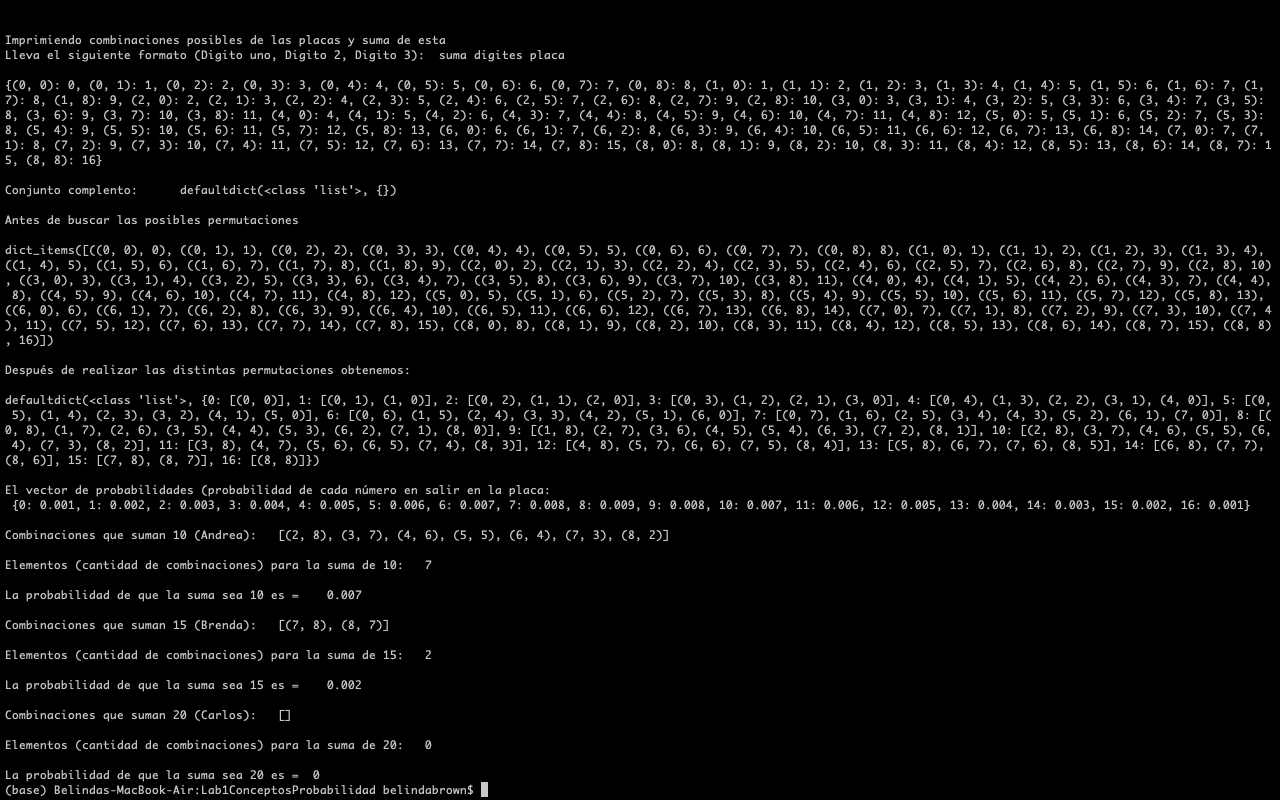

* **Últimas cifras de las placas**: Calcule la probabilidad de que se repitan las dos últimas cifras de la matrícula en quince automóviles anotados al azar. 

In [ ]:
# Ejemplo 2. 2
#Parte de la coincidencia de las placas
#Últimas cifras de las placas: Calcule la
#probabilidad de que se repitan las dos últimas cifras
#de la matrícula en quince automóviles anotados al azar.

#Utilizando el método de LA REGLA DE LAPLACE Y LA COMBINATORIA


#Recuerde que como es coincidencia de días nos fijamos en los 0-9  digitos qu tiene la placa = 10
print("\nEste programa funciona para calcular la coincidencia en los dos últimos digitos de una placa\n")
print("Se calcula para la segunda pregunta en el ejemlo 2.2 \n")
#probabilidad 1
probabilidad15 = 1.0
#personas presentes = asistentes en este caso son 50 para
carros = 15
print("Numero de placas analizadas (carros vistos):   ", carros)

#son dos digitos combinados 10x10
#calculando la probabilidad
for i in range(carros):
    probabilidad15 = probabilidad15 * (100-i)/100
print("\nProbabilidad de que coincida los dos últimos digitos de la placa es de {0:.2f}" .format(1 - probabilidad15))


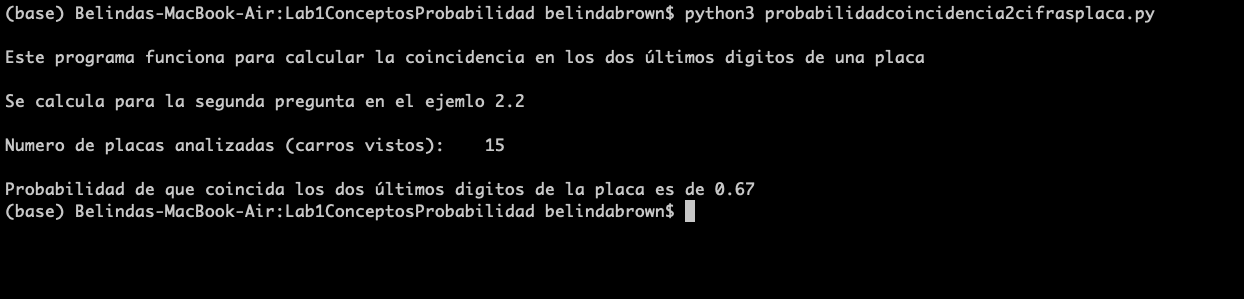

## Ejemplo 2.3

* **La coincidencia de cumpleaños**: En una fiesta a la que concurren un total de 50 personas, una amiga intrépida afirma que en la fiesta debe haber por lo menos dos personas que cumplen años el mismo día. ¿Deberíamos creerle? [3] (Plantee la solución para _N_ asistentes a la fiesta).


In [ ]:
# Ejemplo 2. 3
#La coincidencia de cumpleaños:
###En una fiesta a la que concurren un total de 50 personas,
# una amiga intrépida afirma que en la fiesta debe haber por
#lo menos dos personas que cumplen años el mismo día. ¿Deberíamos creerle?

#Utilizando el método de LA REGLA DE LAPLACE Y LA COMBINATORIA


#Recuerde que como es coincidencia de días nos fijamos en los 365  días que tiene el año
print("\nEste programa funciona para calcular la coincidencia en el día de cumpleaños en un evento con N personas\n")
print("Inicialmente se calcula para la primera pregunta en el ejemlo 2.3 \n")
#probabilidad 1
probabilidad50 = 1.0
#personas presentes = asistentes en este caso son 50 para
asistentes = 50
print("Numero de asistentes en la fiesta:   ", asistentes)

#calculando la probabilidad
for i in range(asistentes):
    probabilidad50 = probabilidad50 * (365-i)/365
print("\nProbabilidad de que coincida una misma fecha de cumpleaños es {0:.2f}" .format(1 - probabilidad50))

npersonasAsistentes = int(input("Digite el número personas asistentes a la fiesta:\n"))
probabilidadN = 1.0
print("\nCorroborando internamente el número de asistentes:   ", npersonasAsistentes)


for iterador in range(npersonasAsistentes):
    probabilidadN = probabilidadN * (365-iterador)/365
print("\nProbabilidad de que coincida una misma fecha de cumpleaños es {0:.2f}" .format(1 - probabilidadN))


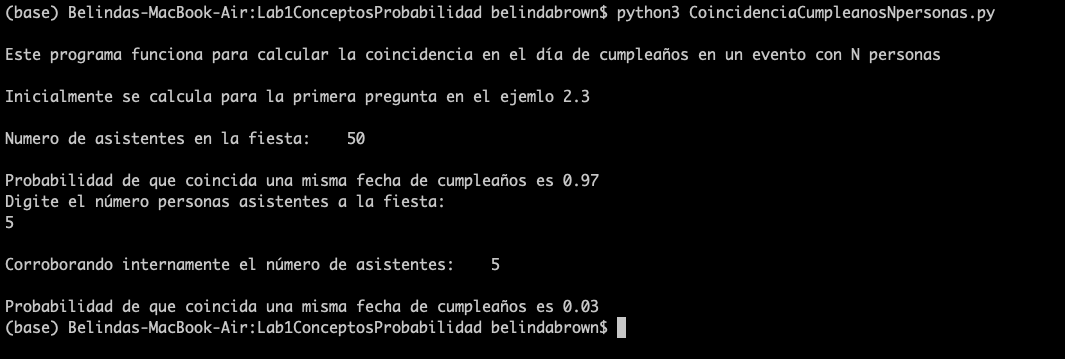

# Teorema de Bayes

El teorema de Bayes, también conocido como la "regla de probabilidad condicional inversa", tiene la forma general

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$

Es útil cuando se cuestiona la premisa de un resultado.

## Ejemplo 3.1

* Un moderno edificio (la Escuela de Ingeniería Eléctrica) tiene dos ascensores para uso de los estudiantes. El primero de los ascensores es usado el 45% de las ocasiones, mientras que el segundo es usado el resto de las ocasiones. El uso continuado de los ascensores provoca un 5% de fallos en el primero de los ascensores y un 8% en el segundo. Un día suena la alarma de uno de los ascensores porque ha fallado. Calcule la probabilidad de que haya sido el primero de los ascensores.

In [ ]:
'''
Un primer acercamiento intuitivo a la
solución nos dice que si el primero se
usa menos veces y falla con menor porcentaje
entonces la probabilidad de que haya sido el 
de la alarma será menor al 50%.
'''

# Datos generales
p_ascensores = [0.45, 0.55]
p_fallo = [0.05, 0.08]

'''
Con [P(A), P(B)] = p_ascensores y
[P(F|A), P(F|B)] = p_fallo, entonces
           O
          / \
         /   \
       P(A)  P(B)
       /       \
    P(F|A)   P(F|B)
     /           \
    F             F
'''

# Probabilidad total de fallar
p_fallar = sum([p_ascensores[i] * p_fallo[i] for i in range(len(p_ascensores))])

'''
Si P(F) = p_fallar es la probabilidad de fallar
(y de que suene la alarma), entonces el teorema
de Bayes queda como:

         P(F|A) P(A)
P(A|F) = -----------
             P(F)
'''

# Aplicación de Teorema de Bayes
p_bayes = [(p_fallo[i] * p_ascensores[i]) / p_fallar for i in range(len(p_ascensores))]
print("La probabilidad de que haya sido el primero de los ascensores es {A:0.2f}. Y el segundo {B:0.2f}".format(A=p_bayes[0]*100, B=p_bayes[1]*100))

### Resultado  ------ Probabilidad de fallo total, teorema de Bayes
# R/
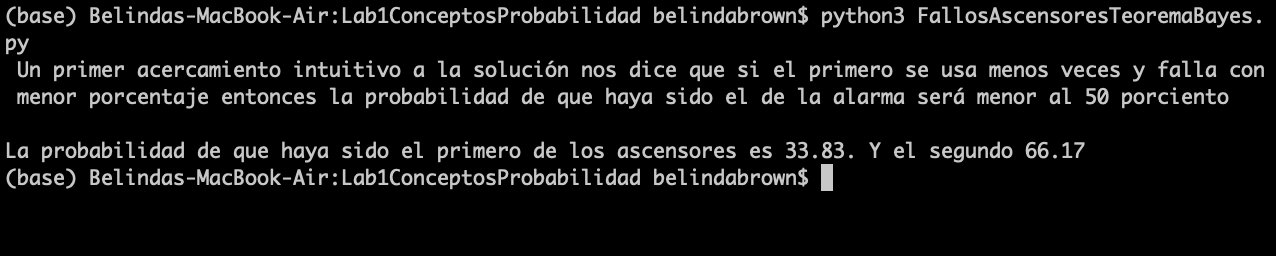


## Ejemplo 3.2

* Hay una ciudad de 50 000 habitantes, con la siguiente distribución de población:
    
    $$\begin{matrix} \text{Niñas} & \text{Niños} & \text{Mujeres} & \text{Hombres} \\ 11000 & 9000 & 16000 & 14000 \end{matrix}$$
        
    Hay también un reporte de 9000 casos de una nueva variedad de virus que-no-debe-ser-mencionada, distribuidos de la siguiente forma:
    
    $$\begin{matrix} \text{Niñas} & \text{Niños} & \text{Mujeres} & \text{Hombres} \\ 2000 & 1500 & 3000 & 2500 \end{matrix}$$
    
    ¿Está la probabilidad de contraer el virus relacionada con la pertenencia a un sector demográfico? Esto puede estudiarse analizando las probabilidades $P(\text{tener gripe} \mid \text{pertenece a X sector})$ [4]

In [ ]:
#Ejemplo 3.2
#Utilizando el teorema de Bayes
print("\nHay una ciudad de 50 000 habitantes, con la siguiente distribución de población: Niñas 11000 Niños 9000 Mujeres 16000 Hombres 14000. Hay también un reporte de 9000 casos de una nueva variedad de virus que-no-debe-ser-mencionada, distribuidos de la siguiente forma: Niñas 2000 Niños 1500 Mujeres 3000 Hombres 2500 ¿Está la probabilidad de contraer el virus relacionada con la pertenencia a un sector demográfico? Esto puede estudiarse analizando las probabilidades 𝑃(tener gripe∣pertenece a X sector\n")

#Forma de ejecutarlo
#python3 InfeccionPoblacionTeoremaBayes.py

#se calcula probailidad para cada sector de la poblacion no infectada
MuestraCiudad = 50000
NinasNaci = 11000
NinosNaci = 9000
MujeresNaci = 16000
HombresNaci = 14000

#Calculando La probabilidad de un evento A se define a priori
#(sin experimentación) como:
probabilidadNinasNaci = round((NinasNaci/MuestraCiudad),2)
probabilidadNinosNaci = round((NinosNaci/MuestraCiudad),2)
probabilidadMujeresNaci = round((MujeresNaci/MuestraCiudad),2)
probabilidadHombresNaci = round((HombresNaci/MuestraCiudad),2)

# print("Probibilidad de una niña en la ciudad: ", probabilidadNinasNaci )
# print("Probibilidad de una niño en la ciudad: ", probabilidadNinosNaci )
# print("Probibilidad de una mujer en la ciudad: ", probabilidadMujeresNaci )
# print("Probabilidad de hombre en la ciudad: ", probabilidadHombresNaci)
#se calcula probailidad Poblacion infectada
PoblacionInfectadaTotal = 9000

CasosNinas = 2000
CasosNinos = 1500
CasosMujeres = 3000
CasosHombres = 2500

#Calculando La probabilidad de un evento A se define a priori
#(sin experimentación) como:
probabilidadNinasInfec =  round((CasosNinas/PoblacionInfectadaTotal),2)
probabilidadNinosInfec = round((CasosNinos/PoblacionInfectadaTotal),2)
probabilidadMujeresInfec = round((CasosMujeres/PoblacionInfectadaTotal),2)
probabilidadHombresInfec = round((CasosHombres/PoblacionInfectadaTotal),2)

# print("Probibilidad de una niña infectada en la ciudad: ", probabilidadNinasInfec )
# print("Probibilidad de una niño infectado en la ciudad: ", probabilidadNinosInfec )
# print("Probibilidad de una mujer infectada en la ciudad: ", probabilidadMujeresInfec )
# print("Probabilidad de hombre infectado en la ciudad: ", probabilidadHombresInfec)



# Datos generales
p_nacimientos = [probabilidadNinasNaci, probabilidadNinosNaci, probabilidadMujeresNaci, probabilidadHombresNaci]
#p_nacimientos = [0.22, 0.18, 0.32, 0.28]
p_infectados = [probabilidadNinasInfec, probabilidadNinosInfec, probabilidadMujeresInfec, probabilidadHombresInfec]
#p_infectados = [0.22, 0.17, 0.33, 0.28]
###
####Con [P(A), P(B)] = p_nacimientos y
###[P(F|A), P(F|B)] = p_infectados, entonces
#           O
#          / \
#         /   \
#       P(A)  P(B)
#       /       \
#    P(F|A)   P(F|B)
#     /           \
#    F             F
#####

# Probabilidad total de infectarse
p_infeccion = sum([p_nacimientos[d] * p_infectados[d] for d in range(len(p_nacimientos))])

####
##Si P(F) = p_infectados es la probabilidad de infectarse
###(y de que se den cuenta), entonces el teorema
###de Bayes queda como:
###
##         P(F|A) P(A)
##P(A|F) = -----------
##             P(F)
###

# Aplicación de Teorema de Bayes
p_bayes = [(p_infectados[i]*p_nacimientos[i]) / p_infeccion for i in range(len(p_nacimientos))]
print("La probibilidad de infección de en niñas es {A:0.2f}, el niños {B:0.2f}, el mujeres {C:0.2f} y el de hombres {D:0.2f}".format(A=p_bayes[0]*100, B=p_bayes[1]*100, C=p_bayes[2]*100, D=p_bayes[3]*100))


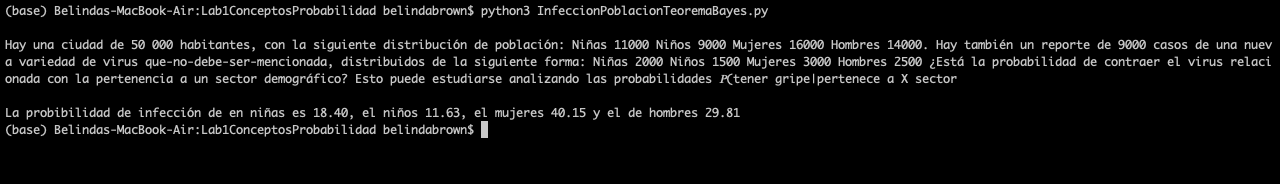